In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os

import torch
import torch.nn as nn
from dataloader.dataloader import load_data
import numpy as np

from util import train_validate
import matplotlib.pyplot as plt

torch.backends.cudnn.benchmark = True

# Task 1

In [5]:
config = {
        'model' : 'basic',
        'dataset' : 'mnist',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-1,
        'epochs' : 30,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'SGD',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 1,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)

[INFO]: Epoch 1/30
Train loss: 0.4900, Train accuracy: 84.46
Validation loss: 0.1231, Validation accuracy: 95.98
--------------------------------------------------
[INFO]: Epoch 2/30
Train loss: 0.1491, Train accuracy: 95.56
Validation loss: 0.0686, Validation accuracy: 97.77
--------------------------------------------------
[INFO]: Epoch 3/30
Train loss: 0.1042, Train accuracy: 96.89
Validation loss: 0.0465, Validation accuracy: 98.47
--------------------------------------------------
[INFO]: Epoch 4/30
Train loss: 0.0855, Train accuracy: 97.41
Validation loss: 0.0420, Validation accuracy: 98.53
--------------------------------------------------
[INFO]: Epoch 5/30
Train loss: 0.0713, Train accuracy: 97.83
Validation loss: 0.0401, Validation accuracy: 98.62
--------------------------------------------------
[INFO]: Epoch 6/30
Train loss: 0.0627, Train accuracy: 98.09
Validation loss: 0.0418, Validation accuracy: 98.57
--------------------------------------------------
[INFO]: Epoch 7/

## Loss vs Epochs

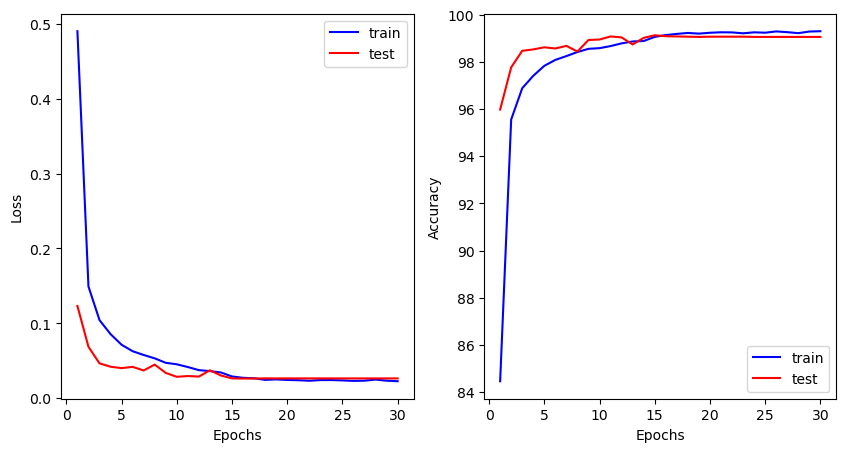

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(np.arange(len(train_loss_array)) + 1,train_loss_array,c='b',label='train')
plt.plot(np.arange(len(val_loss_array)) + 1,val_loss_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(len(train_accuracy_array)) + 1,train_accuracy_array,c='b',label='train')
plt.plot(np.arange(len(val_accuracy_array)) + 1,val_accuracy_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
print(f"The Accuracy of the above model on test data is : {max(val_accuracy_array)}")

The Accuracy of the above model on test data is : 99.13


**Initial Accuracy on MNIST: 99.13%**

# Task 2

## MNIST

### Change in Network

In [8]:
config = {
        'model' : 'resnet18',
        'dataset' : 'mnist',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-1,
        'epochs' : 30,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'SGD',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 1,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)

[INFO]: Epoch 1/30
Train loss: 0.3303, Train accuracy: 90.79
Validation loss: 0.0731, Validation accuracy: 97.94
--------------------------------------------------
[INFO]: Epoch 2/30
Train loss: 0.0754, Train accuracy: 97.68
Validation loss: 0.0340, Validation accuracy: 98.84
--------------------------------------------------
[INFO]: Epoch 3/30
Train loss: 0.0571, Train accuracy: 98.28
Validation loss: 0.1880, Validation accuracy: 94.54
--------------------------------------------------
[INFO]: Epoch 4/30
Train loss: 0.0475, Train accuracy: 98.55
Validation loss: 0.0353, Validation accuracy: 98.88
--------------------------------------------------
[INFO]: Epoch 5/30
Train loss: 0.0393, Train accuracy: 98.81
Validation loss: 0.0261, Validation accuracy: 99.24
--------------------------------------------------
[INFO]: Epoch 6/30
Train loss: 0.0345, Train accuracy: 98.98
Validation loss: 0.0239, Validation accuracy: 99.22
--------------------------------------------------
[INFO]: Epoch 7/

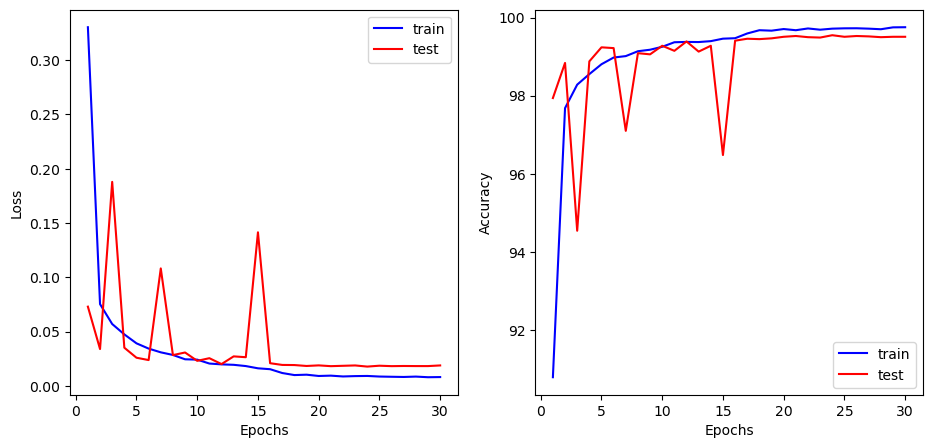

In [9]:
plt.figure(figsize=(11,5))

plt.subplot(121)
plt.plot(np.arange(len(train_loss_array)) + 1,train_loss_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_loss_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(len(train_loss_array)) + 1,train_accuracy_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_accuracy_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
print(f"The Accuracy of the above model on test data is : {max(val_accuracy_array)}")

The Accuracy of the above model on test data is : 99.55


### Change in Optimizer

In [25]:
config = {
        'model' : 'basic',
        'dataset' : 'mnist',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 50,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'SGD',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 1,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

optimizers = ['Adam', 'SGD', 'RMSprop',]

val_loss_arrays, val_accuracy_arrays, train_loss_arrays, train_accuracy_arrays = [], [], [], []

for optimizer in optimizers:
    config['optimizer'] = optimizer
    val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)
    
    val_loss_arrays.append(val_loss_array)
    val_accuracy_arrays.append(val_accuracy_array)

[INFO]: Epoch 1/50
Train loss: 0.2542, Train accuracy: 92.19
Validation loss: 0.0560, Validation accuracy: 98.07
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 0.0897, Train accuracy: 97.37
Validation loss: 0.0370, Validation accuracy: 98.64
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 0.0650, Train accuracy: 98.04
Validation loss: 0.0336, Validation accuracy: 98.89
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 0.0544, Train accuracy: 98.33
Validation loss: 0.0275, Validation accuracy: 99.08
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.0460, Train accuracy: 98.58
Validation loss: 0.0279, Validation accuracy: 99.10
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.0423, Train accuracy: 98.69
Validation loss: 0.0324, Validation accuracy: 98.93
--------------------------------------------------
[INFO]: Epoch 7/

Train loss: 0.3031, Train accuracy: 91.09
Validation loss: 0.1948, Validation accuracy: 94.29
--------------------------------------------------
[INFO]: Epoch 30/50
Train loss: 0.2996, Train accuracy: 91.09
Validation loss: 0.1923, Validation accuracy: 94.19
--------------------------------------------------
[INFO]: Epoch 31/50
Train loss: 0.2978, Train accuracy: 91.17
Validation loss: 0.1887, Validation accuracy: 94.38
--------------------------------------------------
[INFO]: Epoch 32/50
Train loss: 0.2911, Train accuracy: 91.38
Validation loss: 0.1863, Validation accuracy: 94.47
--------------------------------------------------
[INFO]: Epoch 33/50
Train loss: 0.2859, Train accuracy: 91.51
Validation loss: 0.1831, Validation accuracy: 94.44
--------------------------------------------------
[INFO]: Epoch 34/50
Train loss: 0.2813, Train accuracy: 91.70
Validation loss: 0.1800, Validation accuracy: 94.53
--------------------------------------------------
[INFO]: Epoch 35/50
Train loss

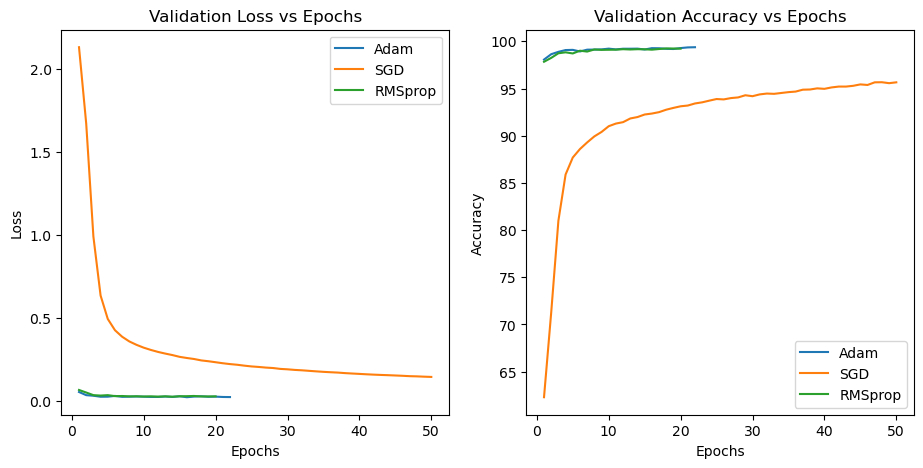

In [26]:
plt.figure(figsize=(11,5))

plt.subplot(121)
for i in range(len(optimizers)):
    plt.plot(np.arange(len(val_loss_arrays[i])) + 1,val_loss_arrays[i], label=f"{optimizers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Validation Loss vs Epochs")
plt.legend()

plt.subplot(122)
for i in range(len(optimizers)):
    plt.plot(np.arange(len(val_accuracy_arrays[i])) + 1,val_accuracy_arrays[i], label=f"{optimizers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Validation Accuracy vs Epochs")
plt.legend()

In [27]:
for i in range(len(optimizers)):
    print(f"Accuracy of above model using {optimizers[i]} : {max(val_accuracy_arrays[i])}")

Accuracy of above model using Adam : 99.38
Accuracy of above model using SGD : 95.67
Accuracy of above model using RMSprop : 99.25


### Change In Learning Scheduler

In [29]:
config = {
        'model' : 'basic',
        'dataset' : 'mnist',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 50,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'Adam',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 1,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

learning_rate_schedulers = ["ReduceLROnPlateau", "ExponentialLR", "CycleLR"]

val_loss_arrays, val_accuracy_arrays, train_loss_arrays, train_accuracy_arrays = [], [], [], []

for lr in learning_rate_schedulers:
    config['lr_scheduler'] = lr
    val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)
    
    val_loss_arrays.append(val_loss_array)
    val_accuracy_arrays.append(val_accuracy_array)

[INFO]: Epoch 1/50
Train loss: 0.3014, Train accuracy: 90.54
Validation loss: 0.0568, Validation accuracy: 98.18
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 0.1034, Train accuracy: 96.97
Validation loss: 0.0401, Validation accuracy: 98.63
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 0.0724, Train accuracy: 97.85
Validation loss: 0.0351, Validation accuracy: 98.76
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 0.0628, Train accuracy: 98.15
Validation loss: 0.0305, Validation accuracy: 98.96
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.0532, Train accuracy: 98.36
Validation loss: 0.0262, Validation accuracy: 98.98
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.0433, Train accuracy: 98.63
Validation loss: 0.0274, Validation accuracy: 99.10
--------------------------------------------------
[INFO]: Epoch 7/

Train loss: 0.0341, Train accuracy: 98.90
Validation loss: 0.0284, Validation accuracy: 99.00
--------------------------------------------------
Epoch 0.03: adjusting learning rate of group 0 to 1.5627e-03.
[INFO]: Epoch 9/50
Train loss: 0.0308, Train accuracy: 99.02
Validation loss: 0.0258, Validation accuracy: 99.18
--------------------------------------------------
Epoch 0.03: adjusting learning rate of group 0 to 1.5111e-03.
[INFO]: Epoch 10/50
Train loss: 0.0281, Train accuracy: 99.06
Validation loss: 0.0235, Validation accuracy: 99.25
--------------------------------------------------
Epoch 0.02: adjusting learning rate of group 0 to 1.4662e-03.
[INFO]: Epoch 11/50
Train loss: 0.0244, Train accuracy: 99.20
Validation loss: 0.0254, Validation accuracy: 99.25
--------------------------------------------------
Epoch 0.03: adjusting learning rate of group 0 to 1.5029e-03.
[INFO]: Epoch 12/50
Train loss: 0.0244, Train accuracy: 99.20
Validation loss: 0.0240, Validation accuracy: 99.31

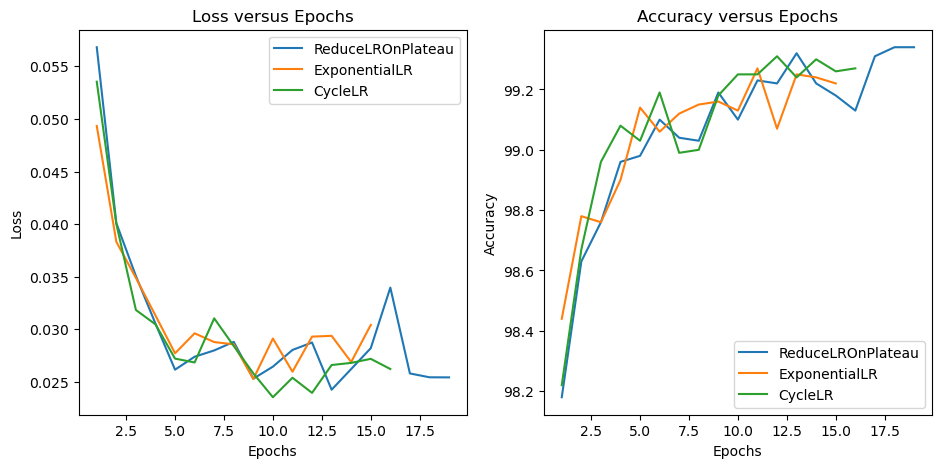

In [30]:
plt.figure(figsize=(11,5))

plt.subplot(121)
for i in range(len(learning_rate_schedulers)):                          
    plt.plot(np.arange(len(val_loss_arrays[i])) + 1,val_loss_arrays[i], label=f"{learning_rate_schedulers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss versus Epochs")
plt.legend()

plt.subplot(122)
for i in range(len(learning_rate_schedulers)):
    plt.plot(np.arange(len(val_accuracy_arrays[i])) + 1,val_accuracy_arrays[i], label=f"{learning_rate_schedulers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Epochs")
plt.legend()

In [31]:
for i in range(len(learning_rate_schedulers)):
    print(f"Accuracy of above model using {learning_rate_schedulers[i]} : {max(val_accuracy_arrays[i])}")

Accuracy of above model using ReduceLROnPlateau : 99.34
Accuracy of above model using ExponentialLR : 99.27
Accuracy of above model using CycleLR : 99.31


## Q1


**How does changing in model affect the final accuracy**: 

Changing the model leads small change in accuracy Basic model being 99.13% and ResNet18 being 99.55%. This is because MNIST is a relatively simple dataset and doesnt not require the such a large network like ResNet18 to achieve high accuracies.

**How does changing the learning rate scheuduler affect the final accuracy**:

Changing the learning rate scheduler also does not boast a large difference in accuarcies, however ReduceLROnPlateau does seem to have a slight advantage over the other schedulers. [Shown in the graphs plotted in section 2.1.3]

**How does changing the optimizer affect the final accuracy**:

Changing the optimizer has the largest affect on final accuracy, this is due to the fact that Adam and RMSProp optimizer are adaptative optimizers and adjust the learning rate during training whereas SGD does not have any such adaptive capability. Thus Adam and RMSProp converge alot faster (require lesser epochs) than SGD, with Adam performing slightly better than RMSProp. [Shown in the graphs plotted in section 2.1.2]

## CIFAR

### BasicNet

In [34]:
config = {
        'model' : 'basic',
        'dataset' : 'cifar10',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 50,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'Adam',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 3,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)

Files already downloaded and verified
[INFO]: Epoch 1/50
Train loss: 1.5898, Train accuracy: 43.14
Validation loss: 1.2528, Validation accuracy: 54.77
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 1.2486, Train accuracy: 55.48
Validation loss: 1.0892, Validation accuracy: 60.90
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 1.0963, Train accuracy: 61.05
Validation loss: 0.9677, Validation accuracy: 65.69
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 1.0041, Train accuracy: 64.52
Validation loss: 0.9236, Validation accuracy: 67.47
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.9261, Train accuracy: 67.34
Validation loss: 0.9039, Validation accuracy: 68.04
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.8780, Train accuracy: 68.97
Validation loss: 0.8683, Validation accuracy: 69.60
-----------------------------

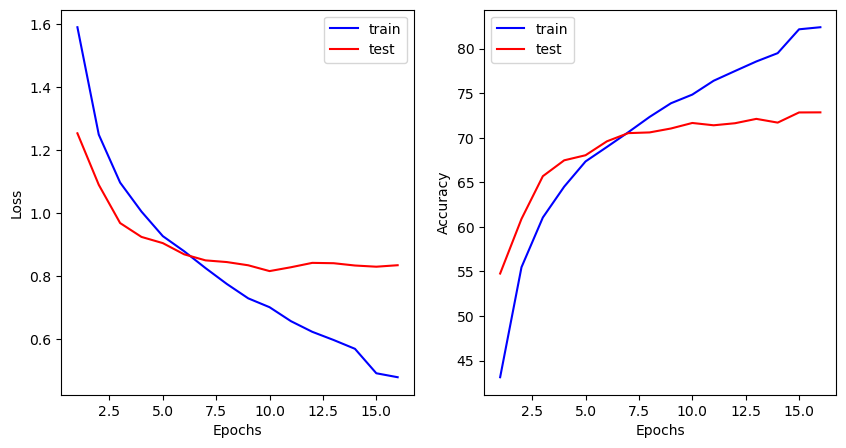

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(np.arange(len(train_loss_array)) + 1,train_loss_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_loss_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(len(train_loss_array)) + 1,train_accuracy_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_accuracy_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [36]:
print(f"The Accuracy of the above model on test data is : {max(val_accuracy_array)}")

The Accuracy of the above model on test data is : 72.85


### Resnet 18 base

In [37]:
config = {
        'model' : 'resnet18',
        'dataset' : 'cifar10',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 50,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'Adam',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 3,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)

Files already downloaded and verified
[INFO]: Epoch 1/50
Train loss: 1.6270, Train accuracy: 40.43
Validation loss: 1.3828, Validation accuracy: 51.67
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 1.1828, Train accuracy: 57.32
Validation loss: 1.1609, Validation accuracy: 59.97
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 0.9980, Train accuracy: 64.80
Validation loss: 1.0583, Validation accuracy: 63.64
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 0.8764, Train accuracy: 69.18
Validation loss: 0.8524, Validation accuracy: 70.83
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.7970, Train accuracy: 72.09
Validation loss: 0.8168, Validation accuracy: 72.06
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.7384, Train accuracy: 74.15
Validation loss: 0.7993, Validation accuracy: 72.46
-----------------------------

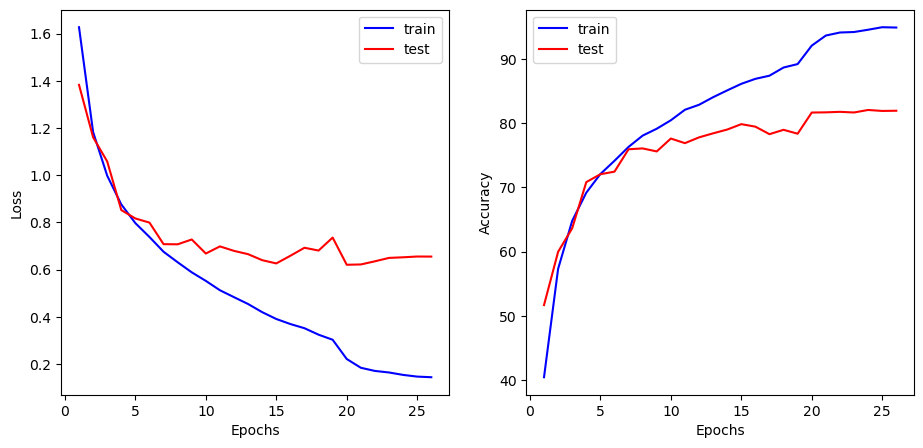

In [38]:
plt.figure(figsize=(11,5))

plt.subplot(121)
plt.plot(np.arange(len(train_loss_array)) + 1,train_loss_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_loss_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(len(train_loss_array)) + 1,train_accuracy_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_accuracy_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
print(f"The Accuracy of the above model on test data is : {max(val_accuracy_array)}")

The Accuracy of the above model on test data is : 82.07


## Hyperparameter Search

### Optimizer

In [40]:
config = {
        'model' : 'resnet18',
        'dataset' : 'cifar10',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 50,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'SGD',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 3,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

optimizers = ['Adam', 'SGD', 'RMSprop',]

val_loss_arrays, val_accuracy_arrays, train_loss_arrays, train_accuracy_arrays = [], [], [], []

for optimizer in optimizers:
    config['optimizer'] = optimizer
    val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)
    
    val_loss_arrays.append(val_loss_array)
    val_accuracy_arrays.append(val_accuracy_array)

Files already downloaded and verified
[INFO]: Epoch 1/50
Train loss: 1.5969, Train accuracy: 41.45
Validation loss: 1.3381, Validation accuracy: 53.34
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 1.1699, Train accuracy: 57.86
Validation loss: 1.1030, Validation accuracy: 61.08
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 0.9817, Train accuracy: 65.39
Validation loss: 0.9831, Validation accuracy: 65.60
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 0.8761, Train accuracy: 69.12
Validation loss: 0.8613, Validation accuracy: 70.17
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.7945, Train accuracy: 71.98
Validation loss: 0.7875, Validation accuracy: 72.11
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.7304, Train accuracy: 74.39
Validation loss: 0.8367, Validation accuracy: 71.27
-----------------------------

Train loss: 1.4039, Train accuracy: 47.93
Validation loss: 1.4693, Validation accuracy: 48.80
--------------------------------------------------
[INFO]: Epoch 30/50
Train loss: 1.3935, Train accuracy: 48.59
Validation loss: 1.4574, Validation accuracy: 49.17
--------------------------------------------------
[INFO]: Epoch 31/50
Train loss: 1.3801, Train accuracy: 48.92
Validation loss: 1.4513, Validation accuracy: 49.66
--------------------------------------------------
[INFO]: Epoch 32/50
Train loss: 1.3756, Train accuracy: 49.05
Validation loss: 1.4141, Validation accuracy: 50.06
--------------------------------------------------
[INFO]: Epoch 33/50
Train loss: 1.3649, Train accuracy: 49.48
Validation loss: 1.4411, Validation accuracy: 50.07
--------------------------------------------------
[INFO]: Epoch 34/50
Train loss: 1.3519, Train accuracy: 50.07
Validation loss: 1.4500, Validation accuracy: 50.12
--------------------------------------------------
[INFO]: Epoch 35/50
Train loss

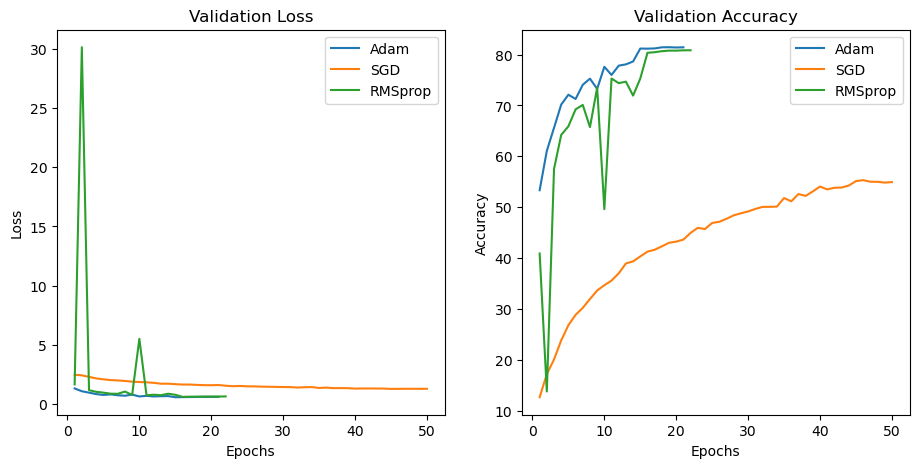

In [41]:
plt.figure(figsize=(11,5))

plt.subplot(121)
for i in range(len(optimizers)):
    plt.plot(np.arange(len(val_loss_arrays[i])) + 1,val_loss_arrays[i], label=f"{optimizers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Validation Loss")
plt.legend()

plt.subplot(122)
for i in range(len(optimizers)):
    plt.plot(np.arange(len(val_accuracy_arrays[i])) + 1,val_accuracy_arrays[i], label=f"{optimizers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Validation Accuracy")
plt.legend()

In [42]:
for i in range(len(optimizers)):
    print(f"Accuracy of above model using {optimizers[i]} : {max(val_accuracy_arrays[i])}")

Accuracy of above model using Adam : 81.44
Accuracy of above model using SGD : 55.32
Accuracy of above model using RMSprop : 80.84


### Learning Rate

In [43]:
config = {
        'model' : 'resnet18',
        'dataset' : 'cifar10',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 100,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'Adam',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 3,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

learning_rates = [1e-5,1e-4,1e-3,1e-2,1e-1]

val_loss_arrays, val_accuracy_arrays, train_loss_arrays, train_accuracy_arrays = [], [], [], []

for lr in learning_rates:
    config['lr'] = lr
    val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)
    
    val_loss_arrays.append(val_loss_array)
    val_accuracy_arrays.append(val_accuracy_array)

Files already downloaded and verified
[INFO]: Epoch 1/100
Train loss: 2.4003, Train accuracy: 13.19
Validation loss: 2.5348, Validation accuracy: 10.44
--------------------------------------------------
[INFO]: Epoch 2/100
Train loss: 2.2281, Train accuracy: 17.88
Validation loss: 2.4411, Validation accuracy: 15.45
--------------------------------------------------
[INFO]: Epoch 3/100
Train loss: 2.0999, Train accuracy: 22.20
Validation loss: 2.2998, Validation accuracy: 20.47
--------------------------------------------------
[INFO]: Epoch 4/100
Train loss: 1.9950, Train accuracy: 25.84
Validation loss: 2.2208, Validation accuracy: 24.00
--------------------------------------------------
[INFO]: Epoch 5/100
Train loss: 1.9194, Train accuracy: 28.24
Validation loss: 2.1435, Validation accuracy: 26.90
--------------------------------------------------
[INFO]: Epoch 6/100
Train loss: 1.8653, Train accuracy: 30.52
Validation loss: 2.0425, Validation accuracy: 30.56
-----------------------

Train loss: 1.1066, Train accuracy: 60.00
Validation loss: 1.0864, Validation accuracy: 61.71
--------------------------------------------------
[INFO]: Epoch 52/100
Train loss: 1.0942, Train accuracy: 60.66
Validation loss: 1.0793, Validation accuracy: 61.84
--------------------------------------------------
[INFO]: Epoch 53/100
Train loss: 1.0886, Train accuracy: 60.75
Validation loss: 1.0638, Validation accuracy: 62.63
--------------------------------------------------
[INFO]: Epoch 54/100
Train loss: 1.0827, Train accuracy: 60.80
Validation loss: 1.0648, Validation accuracy: 62.53
--------------------------------------------------
[INFO]: Epoch 55/100
Train loss: 1.0728, Train accuracy: 61.20
Validation loss: 1.0669, Validation accuracy: 62.47
--------------------------------------------------
[INFO]: Epoch 56/100
Train loss: 1.0620, Train accuracy: 61.54
Validation loss: 1.0470, Validation accuracy: 63.03
--------------------------------------------------
[INFO]: Epoch 57/100
Trai

Files already downloaded and verified
[INFO]: Epoch 1/100
Train loss: 2.0258, Train accuracy: 25.30
Validation loss: 1.8921, Validation accuracy: 33.82
--------------------------------------------------
[INFO]: Epoch 2/100
Train loss: 1.6405, Train accuracy: 39.05
Validation loss: 1.5275, Validation accuracy: 45.00
--------------------------------------------------
[INFO]: Epoch 3/100
Train loss: 1.4912, Train accuracy: 45.23
Validation loss: 1.4205, Validation accuracy: 49.71
--------------------------------------------------
[INFO]: Epoch 4/100
Train loss: 1.3896, Train accuracy: 48.97
Validation loss: 1.2966, Validation accuracy: 53.10
--------------------------------------------------
[INFO]: Epoch 5/100
Train loss: 1.2949, Train accuracy: 52.87
Validation loss: 1.1777, Validation accuracy: 58.09
--------------------------------------------------
[INFO]: Epoch 6/100
Train loss: 1.2076, Train accuracy: 56.05
Validation loss: 1.1566, Validation accuracy: 58.96
-----------------------

Train loss: 0.7346, Train accuracy: 74.14
Validation loss: 0.8249, Validation accuracy: 71.90
--------------------------------------------------
[INFO]: Epoch 7/100
Train loss: 0.6775, Train accuracy: 76.04
Validation loss: 0.8454, Validation accuracy: 71.67
--------------------------------------------------
[INFO]: Epoch 8/100
Train loss: 0.6361, Train accuracy: 77.66
Validation loss: 0.7881, Validation accuracy: 73.51
--------------------------------------------------
[INFO]: Epoch 9/100
Train loss: 0.5927, Train accuracy: 79.18
Validation loss: 0.7472, Validation accuracy: 74.95
--------------------------------------------------
[INFO]: Epoch 10/100
Train loss: 0.5498, Train accuracy: 80.48
Validation loss: 0.6871, Validation accuracy: 77.21
--------------------------------------------------
[INFO]: Epoch 11/100
Train loss: 0.5186, Train accuracy: 81.73
Validation loss: 0.6938, Validation accuracy: 77.20
--------------------------------------------------
[INFO]: Epoch 12/100
Train l

Train loss: 1.0278, Train accuracy: 64.51
Validation loss: 1.1225, Validation accuracy: 62.43
--------------------------------------------------
[INFO]: Epoch 11/100
Train loss: 1.0129, Train accuracy: 65.38
Validation loss: 1.3215, Validation accuracy: 56.12
--------------------------------------------------
[INFO]: Epoch 12/100
Train loss: 1.0193, Train accuracy: 65.05
Validation loss: 1.0239, Validation accuracy: 65.33
--------------------------------------------------
[INFO]: Epoch 13/100
Train loss: 0.9722, Train accuracy: 66.73
Validation loss: 1.1539, Validation accuracy: 62.17
--------------------------------------------------
[INFO]: Epoch 14/100
Train loss: 0.9508, Train accuracy: 67.82
Validation loss: 0.9464, Validation accuracy: 67.50
--------------------------------------------------
[INFO]: Epoch 15/100
Train loss: 0.9966, Train accuracy: 66.39
Validation loss: 57.2121, Validation accuracy: 23.82
--------------------------------------------------
[INFO]: Epoch 16/100
Tra

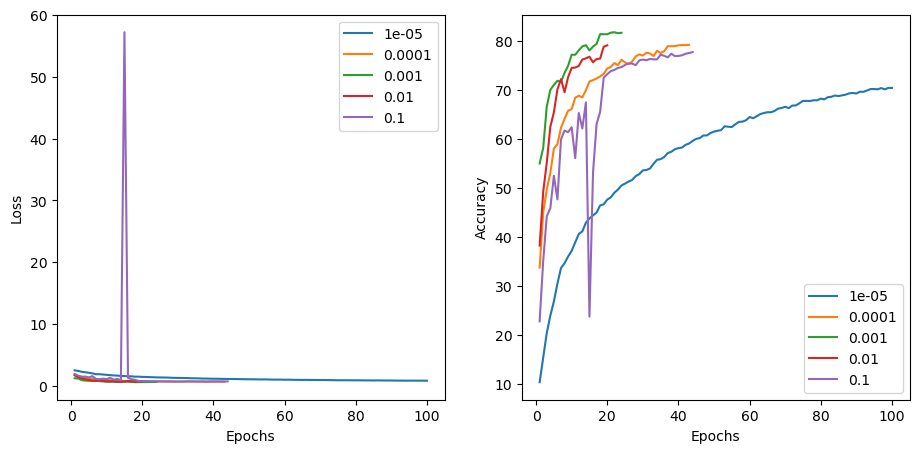

In [44]:
plt.figure(figsize=(11,5))

plt.subplot(121)
for i in range(len(learning_rates)):                          
    plt.plot(np.arange(len(val_loss_arrays[i])) + 1,val_loss_arrays[i], label=f"{learning_rates[i]}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
for i in range(len(learning_rates)):
    plt.plot(np.arange(len(val_accuracy_arrays[i])) + 1,val_accuracy_arrays[i], label=f"{learning_rates[i]}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [45]:
for i in range(len(learning_rates)):
    print(f"Accuracy of above model using LR={learning_rates[i]} : {max(val_accuracy_arrays[i])}")

Accuracy of above model using LR=1e-05 : 70.45
Accuracy of above model using LR=0.0001 : 79.22
Accuracy of above model using LR=0.001 : 81.8
Accuracy of above model using LR=0.01 : 79.13
Accuracy of above model using LR=0.1 : 77.75


### Learning Rate Scheduler

In [46]:
config = {
        'model' : 'resnet18',
        'dataset' : 'cifar10',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 50,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'Adam',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 3,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'lr_scheduler' : "ReduceLROnPlateau"
    }

learning_rate_schedulers = ["ReduceLROnPlateau", "ExponentialLR", "CycleLR"]

val_loss_arrays, val_accuracy_arrays, train_loss_arrays, train_accuracy_arrays = [], [], [], []

for lr in learning_rate_schedulers:
    config['lr_scheduler'] = lr
    val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)
    
    val_loss_arrays.append(val_loss_array)
    val_accuracy_arrays.append(val_accuracy_array)

Files already downloaded and verified
[INFO]: Epoch 1/50
Train loss: 1.6173, Train accuracy: 40.68
Validation loss: 1.3420, Validation accuracy: 51.94
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 1.1986, Train accuracy: 56.84
Validation loss: 1.0329, Validation accuracy: 62.87
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 1.0049, Train accuracy: 64.45
Validation loss: 1.0241, Validation accuracy: 64.56
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 0.8923, Train accuracy: 68.50
Validation loss: 0.8615, Validation accuracy: 70.02
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.8134, Train accuracy: 71.42
Validation loss: 0.8410, Validation accuracy: 70.62
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.7446, Train accuracy: 73.71
Validation loss: 0.8282, Validation accuracy: 70.65
-----------------------------

Train loss: 0.3337, Train accuracy: 88.03
Validation loss: 0.7071, Validation accuracy: 78.72
--------------------------------------------------
Epoch 0.71: adjusting learning rate of group 0 to 8.9144e-04.
[INFO]: Early stopping
Files already downloaded and verified
Adjusting learning rate of group 0 to 1.0000e-03.
[INFO]: Epoch 1/50
Train loss: 1.6212, Train accuracy: 40.53
Validation loss: 1.4542, Validation accuracy: 49.52
--------------------------------------------------
Epoch 1.45: adjusting learning rate of group 0 to 2.9793e-02.
[INFO]: Epoch 2/50
Train loss: 1.9823, Train accuracy: 28.84
Validation loss: 1.7573, Validation accuracy: 34.20
--------------------------------------------------
Epoch 1.76: adjusting learning rate of group 0 to 3.5795e-02.
[INFO]: Epoch 3/50
Train loss: 1.4891, Train accuracy: 45.75
Validation loss: 1.3487, Validation accuracy: 51.24
--------------------------------------------------
Epoch 1.35: adjusting learning rate of group 0 to 2.7704e-02.
[INF

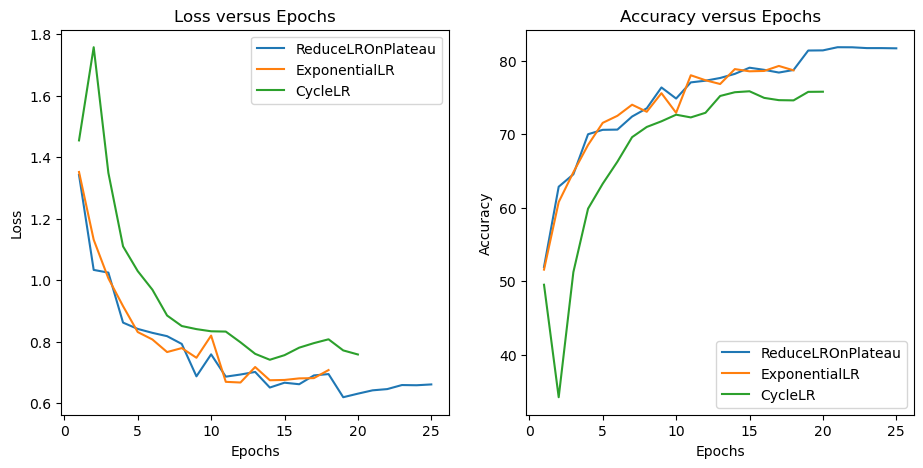

In [47]:
plt.figure(figsize=(11,5))

plt.subplot(121)
for i in range(len(learning_rate_schedulers)):                          
    plt.plot(np.arange(len(val_loss_arrays[i])) + 1,val_loss_arrays[i], label=f"{learning_rate_schedulers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss versus Epochs")
plt.legend()

plt.subplot(122)
for i in range(len(learning_rate_schedulers)):
    plt.plot(np.arange(len(val_accuracy_arrays[i])) + 1,val_accuracy_arrays[i], label=f"{learning_rate_schedulers[i]}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Epochs")
plt.legend()

In [48]:
for i in range(len(learning_rate_schedulers)):
    print(f"Accuracy of above model using {learning_rate_schedulers[i]} : {max(val_accuracy_arrays[i])}")

Accuracy of above model using ReduceLROnPlateau : 81.87
Accuracy of above model using ExponentialLR : 79.32
Accuracy of above model using CycleLR : 75.87


## Q2

**Observations during tuning of Learning Rate Schedules and Optimizers**:

During tuning of the learning rate schedulers, here ReduceLROnPlateau and ExponentialLR slightly edged the CycleLR, with ReduceLROnPlateau performing slightly better than ExponentialLR. With respect to the optimizers, the result were similar to that of MNIST, where Adam and RMSProp converging alot faster than SGD. [Shown in plot in Section 2.4.1 and 2.4.3]

**Compared to MNIST how are the learning rates?**

Comparing many different learning rates, a learning rate of 1e-3 was found to be optimal for training. This is similar to that of MNIST as well. [Shown in plot in Section 2.4.2]

**Number of Epochs and Results**?

The number of epochs required to train CIFAR10 was larger (50 compared to 30) than MNIST, this is likely due to the fact that it contains a larger amount of data (3x32x32 versus 1x28x28) due to a larger image and use of RGB images. Furthermore due to the added complexity, the best model turned out to be a ResNet18 model which achieved an accuracy of 82.07. Looking at the training graphs we can also see that the model was unable to overfit to the training data as well, thus it is possible that a ResNet18 model is not enough to capture the complexity of the dataset, at the same time other techniques can also be tried such as data augmentation to artifically improve the variety of samples in the training data. This tecniques can help improve the final validation accuracy.


**How did you find the appropriate Hyperparameters**

To find the appropriate hyperparameters, one hyperparameter was chosen and varied while other were fixed. This was due to the computational constraints. Provided a larger amount of computing power, an ideal method would be to randomly sample (or use some other types of sophisticated sampling strategies) from the set of all combinations of hyperparameters.

# Task 3

## Base ResNet18 with some layers from MobileNet

In [49]:
config = {
        'model' : 'resnet18_modified',
        'dataset' : 'cifar10',
        'batch_size' : 256,
        'num_workers' : 4,
        'lr' : 1e-3,
        'epochs' : 50,
        'criterion' : nn.NLLLoss,
        'optimizer' : 'Adam',
        'device' : 'cuda' if torch.cuda.is_available() else 'cpu',
        'input_channels' : 3,
        'num_classes' : 10,
        'pin_memory' : True if torch.cuda.is_available() else False,
        'depthwise_convs': [True, False, False, False],
        'lr_scheduler' : "ReduceLROnPlateau"
    }

val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(config)

Files already downloaded and verified
[INFO]: Epoch 1/50
Train loss: 1.6541, Train accuracy: 39.06
Validation loss: 1.3635, Validation accuracy: 50.34
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 1.3045, Train accuracy: 52.68
Validation loss: 1.2484, Validation accuracy: 56.81
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 1.1558, Train accuracy: 58.63
Validation loss: 1.0522, Validation accuracy: 62.92
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 1.0506, Train accuracy: 62.38
Validation loss: 1.0560, Validation accuracy: 63.77
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.9616, Train accuracy: 65.78
Validation loss: 0.9970, Validation accuracy: 65.42
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.8870, Train accuracy: 68.38
Validation loss: 0.9179, Validation accuracy: 68.17
-----------------------------

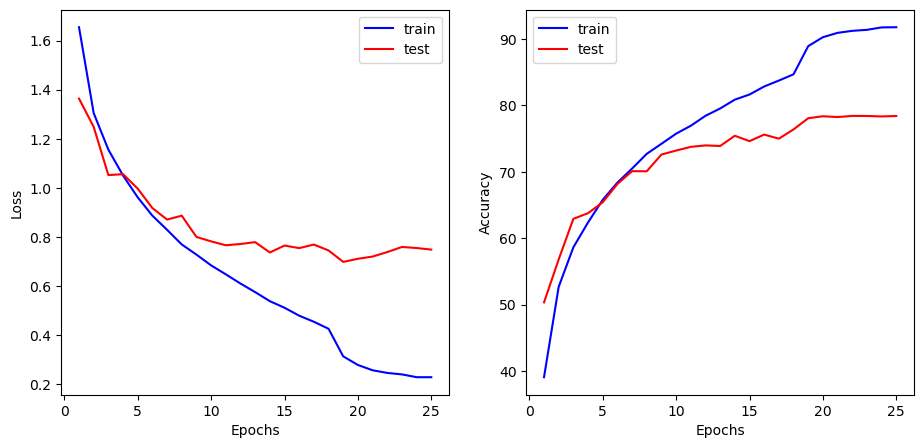

In [50]:
plt.figure(figsize=(11,5))

plt.subplot(121)
plt.plot(np.arange(len(train_loss_array)) + 1,train_loss_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_loss_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(len(train_loss_array)) + 1,train_accuracy_array,c='b',label='train')
plt.plot(np.arange(len(train_loss_array)) + 1,val_accuracy_array, c='r',label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [51]:
print(f"The Accuracy of the above model on test data is : {max(val_accuracy_array)}")

The Accuracy of the above model on test data is : 78.42


In [52]:
print(inference_time)

(3.7366865622997283, 0.4563889909816836)


In [53]:
print(flops, params)

28.406794 11.04353


## Incremental Replacement of Resenet Layers with MobileNet 

In [57]:
config = {
    'model': 'resnet18_modified',
    'dataset': 'cifar10',
    'batch_size': 256,
    'num_workers': 4,
    'lr': 1e-3,
    'epochs': 50,
    'criterion': nn.NLLLoss,
    'optimizer': 'Adam',
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'input_channels': 3,
    'num_classes': 10,
    'pin_memory': True if torch.cuda.is_available() else False,
    'depthwise_convs': [True, False, False, False],
    'lr_scheduler' : "ReduceLROnPlateau"
}

val_loss_arrays = []
val_accuracy_arrays = []
flops_array = []
params_array = []
inference_time_array = []

depthwise_configs = [
    [False, False, False, False], # No blocks repalced
    [True, False, False, False], # Only First
    [True, True, False, False], # First two
    [True, True, True, False],
    [True, True, True, True],
    [False, False, False, True], # Only Last
    [False, False, True, True], # Last two
    [False, True, True, True],
]

for depthwise_config in depthwise_configs:
    config['depthwise_convs'] = depthwise_config
    val_loss_array, val_accuracy_array, train_loss_array, train_accuracy_array, flops, params, inference_time = train_validate(
        config)

    val_loss_arrays.append(val_loss_array)
    val_accuracy_arrays.append(val_accuracy_array)
    flops_array.append(flops)
    params_array.append(params)
    inference_time_array.append(inference_time)

Files already downloaded and verified
[INFO]: Epoch 1/50
Train loss: 1.4643, Train accuracy: 46.94
Validation loss: 1.4844, Validation accuracy: 48.28
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 1.0573, Train accuracy: 62.14
Validation loss: 1.0570, Validation accuracy: 63.36
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 0.8730, Train accuracy: 69.10
Validation loss: 0.8619, Validation accuracy: 70.18
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 0.7442, Train accuracy: 73.79
Validation loss: 0.8051, Validation accuracy: 71.99
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 0.6628, Train accuracy: 76.55
Validation loss: 0.7561, Validation accuracy: 74.28
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.5868, Train accuracy: 79.61
Validation loss: 0.7560, Validation accuracy: 74.04
-----------------------------

Train loss: 1.0872, Train accuracy: 61.05
Validation loss: 1.1055, Validation accuracy: 61.02
--------------------------------------------------
[INFO]: Epoch 5/50
Train loss: 1.0023, Train accuracy: 64.06
Validation loss: 1.0453, Validation accuracy: 62.96
--------------------------------------------------
[INFO]: Epoch 6/50
Train loss: 0.9332, Train accuracy: 66.56
Validation loss: 0.9387, Validation accuracy: 66.85
--------------------------------------------------
[INFO]: Epoch 7/50
Train loss: 0.8765, Train accuracy: 68.70
Validation loss: 0.9549, Validation accuracy: 67.45
--------------------------------------------------
[INFO]: Epoch 8/50
Train loss: 0.8272, Train accuracy: 70.63
Validation loss: 0.8214, Validation accuracy: 71.48
--------------------------------------------------
[INFO]: Epoch 9/50
Train loss: 0.7720, Train accuracy: 72.53
Validation loss: 0.8582, Validation accuracy: 70.32
--------------------------------------------------
[INFO]: Epoch 10/50
Train loss: 0.7

Train loss: 0.5073, Train accuracy: 81.70
Validation loss: 0.7659, Validation accuracy: 75.50
--------------------------------------------------
[INFO]: Epoch 30/50
Train loss: 0.4944, Train accuracy: 82.13
Validation loss: 0.6895, Validation accuracy: 77.63
--------------------------------------------------
Epoch 00030: reducing learning rate of group 0 to 5.0000e-05.
[INFO]: Epoch 31/50
Train loss: 0.4082, Train accuracy: 85.29
Validation loss: 0.6459, Validation accuracy: 78.91
--------------------------------------------------
[INFO]: Epoch 32/50
Train loss: 0.3743, Train accuracy: 86.65
Validation loss: 0.6492, Validation accuracy: 79.29
--------------------------------------------------
[INFO]: Epoch 33/50
Train loss: 0.3659, Train accuracy: 87.05
Validation loss: 0.6556, Validation accuracy: 79.30
--------------------------------------------------
[INFO]: Epoch 34/50
Train loss: 0.3536, Train accuracy: 87.30
Validation loss: 0.6535, Validation accuracy: 79.46
-------------------

Train loss: 0.4354, Train accuracy: 84.39
Validation loss: 0.6341, Validation accuracy: 79.28
--------------------------------------------------
[INFO]: Epoch 42/50
Train loss: 0.4334, Train accuracy: 84.55
Validation loss: 0.6426, Validation accuracy: 79.07
--------------------------------------------------
[INFO]: Epoch 43/50
Train loss: 0.4295, Train accuracy: 84.73
Validation loss: 0.6345, Validation accuracy: 79.37
--------------------------------------------------
[INFO]: Epoch 44/50
Train loss: 0.4285, Train accuracy: 84.63
Validation loss: 0.6367, Validation accuracy: 79.33
--------------------------------------------------
[INFO]: Epoch 45/50
Train loss: 0.4265, Train accuracy: 84.75
Validation loss: 0.6328, Validation accuracy: 79.36
--------------------------------------------------
[INFO]: Epoch 46/50
Train loss: 0.4256, Train accuracy: 84.73
Validation loss: 0.6354, Validation accuracy: 79.52
--------------------------------------------------
[INFO]: Epoch 47/50
Train loss

Train loss: 0.1484, Train accuracy: 94.90
Validation loss: 0.7080, Validation accuracy: 80.31
--------------------------------------------------
[INFO]: Epoch 20/50
Train loss: 0.1218, Train accuracy: 95.88
Validation loss: 0.7124, Validation accuracy: 80.55
--------------------------------------------------
[INFO]: Early stopping
Files already downloaded and verified
[INFO]: Epoch 1/50
Train loss: 1.5022, Train accuracy: 44.08
Validation loss: 1.6350, Validation accuracy: 44.96
--------------------------------------------------
[INFO]: Epoch 2/50
Train loss: 1.1347, Train accuracy: 58.93
Validation loss: 1.3698, Validation accuracy: 53.38
--------------------------------------------------
[INFO]: Epoch 3/50
Train loss: 0.9801, Train accuracy: 65.06
Validation loss: 1.2653, Validation accuracy: 58.05
--------------------------------------------------
[INFO]: Epoch 4/50
Train loss: 0.8743, Train accuracy: 69.16
Validation loss: 0.9869, Validation accuracy: 66.00
------------------------

## Efficiency vs Accuracy Tradeoff

In [88]:
max_validation_accuracies = [max(i) for i in val_accuracy_arrays]
max_validation_accuracies = np.array(max_validation_accuracies)

[(37.245962, 80.93),
 (28.406794, 78.99),
 (72.19713, 78.58),
 (146.097162, 79.59),
 (37.848074, 79.52),
 (30.480394, 80.61),
 (28.658698, 80.55),
 (46.687242, 80.82)]

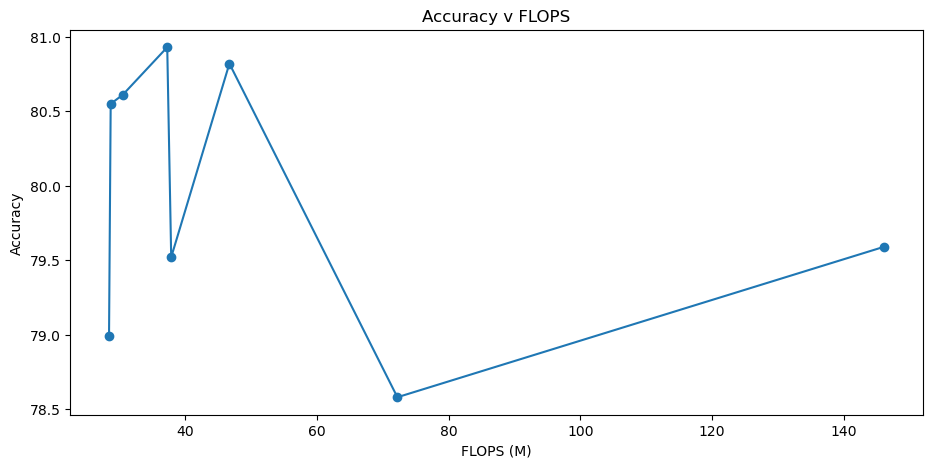

In [91]:
plt.figure(figsize=(11, 5))

flops_array = np.array(flops_array)
ind = np.argsort(flops_array)

plt.plot(flops_array[ind], max_validation_accuracies[ind], marker='o')
plt.title("Accuracy v FLOPS")
plt.xlabel('FLOPS (M)')
plt.ylabel('Accuracy')

list(zip(flops_array,max_validation_accuracies))

From the above plot we can see that a model with lower FLOPS 46.687M MAC performed the best amongst all other models. This particular model corresponds to the model were the last 3 layers of the ResNet18 were changed to the MobileNet layer. Compared to the best model there was actually an increase in the number of MAC performed with a drop of 0.11% in accuracy.

[(11.181642, 80.93),
 (11.04353, 78.99),
 (10.545162, 78.58),
 (8.549002, 79.59),
 (0.558986, 79.52),
 (3.191626, 80.61),
 (1.195466, 80.55),
 (0.697098, 80.82)]

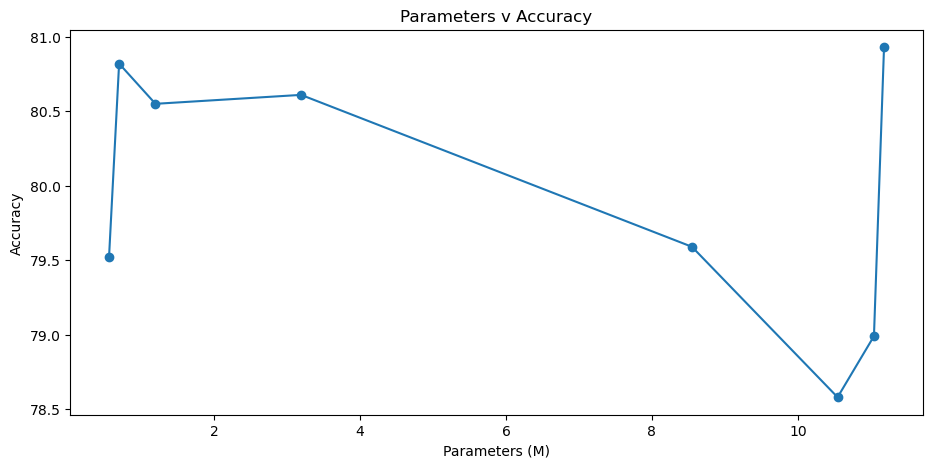

In [94]:
plt.figure(figsize=(11, 5))


params_array = np.array(params_array)
ind = np.argsort(params_array)

plt.plot(params_array[ind], max_validation_accuracies[ind], marker='o')
plt.title("Parameters v Accuracy")
plt.xlabel('Parameters (M)')
plt.ylabel('Accuracy')

list(zip(params_array,max_validation_accuracies))

From the above plot we can see that the model where the last three ResNet18 Layers were changed to MobileNet layer (0.697 M parameters) performed almost as well as the full ResNet18 model which had 11.18 M parameters. Even the model with only 0.559 M parameters performed simialrly to that of the 11.18M parameter model. The 0.697M parameters model only had a 0.11% reduction in accuracy.

[(3.76602672290802, 80.93),
 (3.592393216371536, 78.99),
 (3.5088193876743317, 78.58),
 (3.2422088968753813, 79.59),
 (2.936466114282608, 79.52),
 (3.561467452764511, 80.61),
 (3.4088022706508636, 80.55),
 (3.1342129600048065, 80.82)]

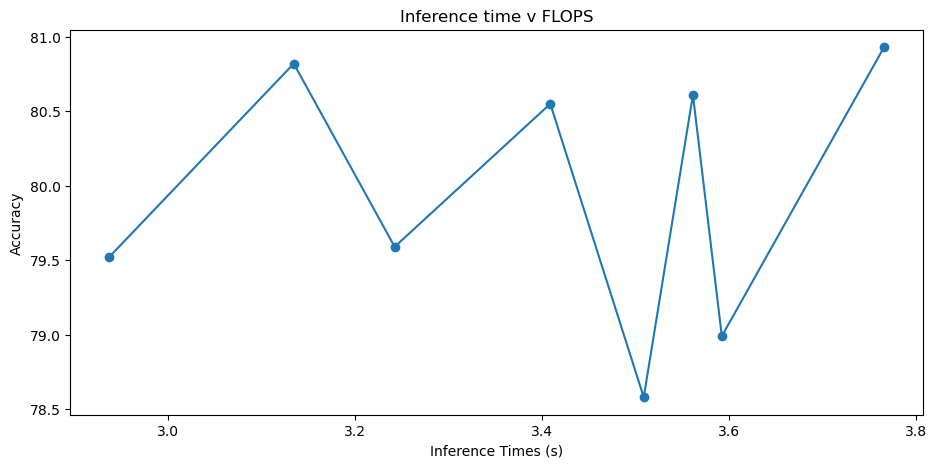

In [99]:
plt.figure(figsize=(11, 5))


inference_times = np.array([i[0] for i in inference_time_array])
errors = np.array([i[1] for i in inference_time_array])

ind = np.argsort(inference_times)

plt.errorbar(inference_times[ind], max_validation_accuracies[ind], marker='o')
plt.title("Inference time v FLOPS")
plt.xlabel('Inference Times (s)')
plt.ylabel('Accuracy')

list(zip(inference_times, max_validation_accuracies))

We see a similar trend here where, there is a 0.63s increase in inference time, at a loss of 0.11% accuracy. Although this result is not as conclusive as the standard deviations were quite large, this is primarily due to the usage of GPU fluctuating with other processes possible interfering causing instabilities in the calcuation.

## Q1

**How do you determine the strategy for replacing the building blocks in ResNet-18 with MobileNet Blocks**

As there are 4 layers with each layer containing two ResNet blocks, each of these building blocks were replaced incrementally and tested with their performance metric being recorded, i.e. the first block was replaced with the MobileNet block, then the first two and so on. The opposite was also done wherein the last block was replaced then the second last and the last and so on. The results of the test are shown in Section 3.3.

## Q2

**To what extent can you advance the accuracy-efficiency trade-off, meaning, what is the accuracy drop (or improvement) and what are the efficiency gains?**

The expanations for the above is given under the plots of their relevent effciency parameter plots.

## Q3

Are the efficiency savings in terms of theoretical metrics proportional to your real-device measurements? Could you analyze why?

In terms of number of parameters used, the efficiency saving leads to a much smaller model, thus the amount of space in memory its occupies is reduced and is proportional to the real-device measurements.

However, metrics such as the inference time, have such a large standard deviation (error-bars), and furthermore are specific to the device it was trained on (My laptop with a RTX 1660). Thus although it is proportional to the savings in my laptop it is not generalizable to other devices.